# Sentiment Analysis Using Machine Learning Classifiers 

# Importing libraries <a id="1"></a>

In [1]:
# DataFrame
import pandas as pd 

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier


#tensorflow
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds

# Utility
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
import re
import string
import pickle

# Loading Dataset <a id="2"></a>

In [2]:
# Construct a tf.data.Dataset
data = pd.read_csv('/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv',encoding='latin', names = ['polarity','id','date','query','user','text'])

In [3]:
data = data.sample(frac=1)
data = data[:200000]

# Data Visualization <a id="3"></a>

Dataset details
target: the polarity of the tweet (0 = negative, 4 = positive)

In [4]:
print("Dataset shape:", data.shape)

Dataset shape: (200000, 6)


In [5]:
data.head(10)

,polarity,id,date,query,user,text
555506,0,2204080376,Wed Jun 17 01:16:18 PDT 2009,NO_QUERY,msproductions,@dannyrodri I feel so violated I waited sooo l...
414943,0,2060945686,Sat Jun 06 19:53:01 PDT 2009,NO_QUERY,shiloh8850,"@AliLinds hey, watching it too! was going to p..."
779028,0,2322831562,Wed Jun 24 23:21:46 PDT 2009,NO_QUERY,Caprica,have been stuck indoors all day cause of the r...
1474178,4,2065680504,Sun Jun 07 09:04:59 PDT 2009,NO_QUERY,CCKitty,layin on the beach soaking up some sun
1370910,4,2051104607,Fri Jun 05 19:52:16 PDT 2009,NO_QUERY,Hayleyj2308,is still learning how to use Twitter.
1416662,4,2057458133,Sat Jun 06 13:02:32 PDT 2009,NO_QUERY,Jessicaaxo,Jonas Brothers youtube i SUSPENDED indefinatel...
1516913,4,2175772415,Mon Jun 15 01:57:28 PDT 2009,NO_QUERY,irinutza26,"@luluts yup, you're right!!! Yummy"
1064445,4,1964704590,Fri May 29 14:40:05 PDT 2009,NO_QUERY,bradhawkins87,Oh My Gosh that was some good chipotle Gott...
481304,0,2179592439,Mon Jun 15 09:18:56 PDT 2009,NO_QUERY,Tuckaa,"@persisss arrrgh i feel ill, my voice is going..."
346919,0,2016305919,Wed Jun 03 06:32:42 PDT 2009,NO_QUERY,xxkassyxx,@erin82883 i don't know. i thought he was all ...


In [6]:
data['polarity'].unique()

array([0, 4])

In [7]:
# Replacing the value 4 -->1 for ease of understanding.
data['polarity'] = data['polarity'].replace(4,1)
data.head()

,polarity,id,date,query,user,text
555506,0,2204080376,Wed Jun 17 01:16:18 PDT 2009,NO_QUERY,msproductions,@dannyrodri I feel so violated I waited sooo l...
414943,0,2060945686,Sat Jun 06 19:53:01 PDT 2009,NO_QUERY,shiloh8850,"@AliLinds hey, watching it too! was going to p..."
779028,0,2322831562,Wed Jun 24 23:21:46 PDT 2009,NO_QUERY,Caprica,have been stuck indoors all day cause of the r...
1474178,1,2065680504,Sun Jun 07 09:04:59 PDT 2009,NO_QUERY,CCKitty,layin on the beach soaking up some sun
1370910,1,2051104607,Fri Jun 05 19:52:16 PDT 2009,NO_QUERY,Hayleyj2308,is still learning how to use Twitter.


In [8]:
data.describe()

,polarity,id
count,200000.000000,2.000000e+05
mean,0.501165,1.998014e+09
std,0.500000,1.941249e+08
min,0.000000,1.467813e+09
25%,0.000000,1.956603e+09
50%,1.000000,2.001954e+09
75%,1.000000,2.177149e+09
max,1.000000,2.329205e+09


In [9]:
# check the number of positive vs. negative tagged sentences
positives = data['polarity'][data.polarity == 1 ]
negatives = data['polarity'][data.polarity == 0 ]

print('Total length of the data is:         {}'.format(data.shape[0]))
print('No. of positve tagged sentences is:  {}'.format(len(positives)))
print('No. of negative tagged sentences is: {}'.format(len(negatives)))

Total length of the data is:         200000
No. of positve tagged sentences is:  100233
No. of negative tagged sentences is: 99767


In [10]:
# get a word count per of text
def word_count(words):
    return len(words.split())

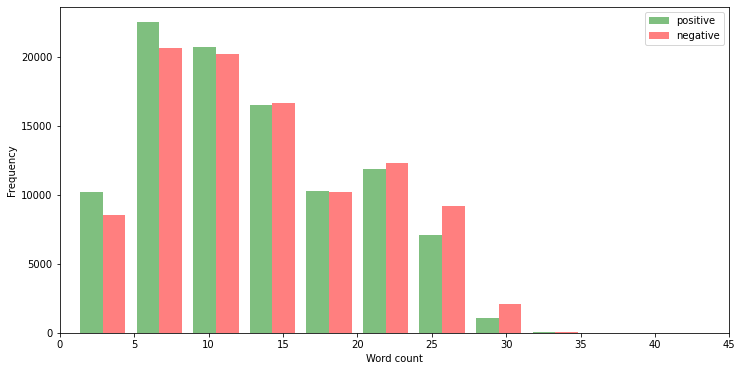

In [11]:
# plot word count distribution for both positive and negative 

data['word count'] = data['text'].apply(word_count)
p = data['word count'][data.polarity == 1]
n = data['word count'][data.polarity == 0]
plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('Word count')
plt.ylabel('Frequency')
g = plt.hist([p, n], color=['g','r'], alpha=0.5, label=['positive','negative'])
plt.legend(loc='upper right')

In [12]:
# get common words in training dataset
from collections import Counter
all_words = []
for line in list(data['text']):
    words = line.split()
    for word in words:
      if(len(word)>2):
        all_words.append(word.lower())
    
    
Counter(all_words).most_common(20)

[('the', 64905),
 ('and', 36919),
 ('you', 29516),
 ('for', 26674),
 ('have', 17886),
 ('that', 16009),
 ("i'm", 15958),
 ('just', 15770),
 ('but', 15586),
 ('with', 14282),
 ('was', 12903),
 ('not', 12791),
 ('this', 11197),
 ('get', 10028),
 ('good', 9669),
 ('like', 9535),
 ('are', 9496),
 ('all', 9253),
 ('out', 8675),
 ('your', 8209)]

# Data Preprocessing <a id="4"></a>

<AxesSubplot:xlabel='polarity', ylabel='count'>

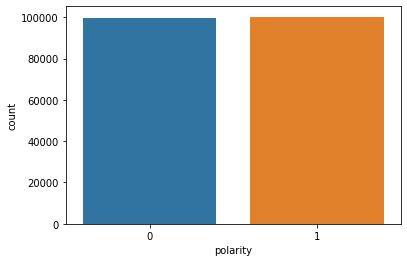

In [13]:
%matplotlib inline
sns.countplot(data['polarity'])

In [14]:
# Removing the unnecessary columns.
data.drop(['date','query','user','word count'], axis=1, inplace=True)

In [15]:
data.drop('id', axis=1, inplace=True)

In [16]:
data.head(10)

,polarity,text
555506,0,@dannyrodri I feel so violated I waited sooo l...
414943,0,"@AliLinds hey, watching it too! was going to p..."
779028,0,have been stuck indoors all day cause of the r...
1474178,1,layin on the beach soaking up some sun
1370910,1,is still learning how to use Twitter.
1416662,1,Jonas Brothers youtube i SUSPENDED indefinatel...
1516913,1,"@luluts yup, you're right!!! Yummy"
1064445,1,Oh My Gosh that was some good chipotle Gott...
481304,0,"@persisss arrrgh i feel ill, my voice is going..."
346919,0,@erin82883 i don't know. i thought he was all ...


In [17]:
#Checking if any null values present
(data.isnull().sum() / len(data))*100

polarity    0.0
text        0.0
dtype: float64

In [18]:
#convrting pandas object to a string type
data['text'] = data['text'].astype('str')

In [19]:
nltk.download('stopwords')
stopword = set(stopwords.words('english'))
print(stopword)

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>
{"wasn't", "mightn't", "isn't", 'few', 'her', 'have', 'through', 'my', 'were', 'the', 'each', 'so', 've', 'those', 'at', 'nor', 'but', 'from', 'no', 't', "won't", 's', "haven't", 'won', 'they', 'are', 'with', "it's", 'll', 'for', 'aren', 'couldn', 'before', 'did', 'who', 'can', 'be', 'just', "should've", 'hadn', 'mustn', 'don', 'after', "mustn't", 'themselves', 'out', 'once', 'yourselves', 'being', 'didn', 'you', "couldn't", 'hers', 'yours', 'mightn', 'same', 'both', 'other', 'needn', 'ours', "needn't", 'again', "aren't", 'am', 'as', 'd', "doesn't", 'has', 'up', "you'll", 'doesn', 'of', 'ourselves', "hasn't", 'his', "shouldn't", 'to', "you'd", 'himself', 'because', 'when', 'it', 'on', 'wasn', 'herself', 'by', 'doing', 'under', 're', 'where', 'hasn', 'about', 'into', 'below', 'a', 'here', 'these', 'in', 'why', 'haven', 'isn', "didn't", 'any', 'weren', 'should', 'ma', 'me'

In [20]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading wordnet: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


False

> The Preprocessing steps taken are:

* Lower Casing: Each text is converted to lowercase.
* Removing URLs: Links starting with "http" or "https" or "www" are replaced by "".

* Removing Usernames: Replace @Usernames with word "". (eg: "@XYZ" to "")
* Removing Short Words: Words with length less than 2 are removed.
* Removing Stopwords: Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. (eg: "the", "he", "have")
* Lemmatizing: Lemmatization is the process of converting a word to its base form. (e.g: “wolves” to “wolf”)

In [21]:
urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern = '@[^\s]+'
def process_tweets(tweet):
  # Lower Casing
    tweet = tweet.lower()
    tweet=tweet[1:]
    # Removing all URls 
    tweet = re.sub(urlPattern,'',tweet)
    # Removing all @username.
    tweet = re.sub(userPattern,'', tweet) 
    #Remove punctuations
    tweet = tweet.translate(str.maketrans("","",string.punctuation))
    #tokenizing words
    tokens = word_tokenize(tweet)
    #Removing Stop Words
    final_tokens = [w for w in tokens if w not in stopword]
    #reducing a word to its word stem 
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    for w in final_tokens:
      if len(w)>1:
        word = wordLemm.lemmatize(w)
        finalwords.append(word)
    return ' '.join(finalwords)

In [22]:
data['processed_tweets'] = data['text'].apply(lambda x: process_tweets(x))
print('Text Preprocessing complete.')

Text Preprocessing complete.


In [23]:
data.head(10)

,polarity,text,processed_tweets
555506,0,@dannyrodri I feel so violated I waited sooo l...,dannyrodri feel violated waited sooo long amp ...
414943,0,"@AliLinds hey, watching it too! was going to p...",alilinds hey watching going put serendipity sa...
779028,0,have been stuck indoors all day cause of the r...,ave stuck indoors day cause rain soooo bored w...
1474178,1,layin on the beach soaking up some sun,ayin beach soaking sun
1370910,1,is still learning how to use Twitter.,still learning use twitter
1416662,1,Jonas Brothers youtube i SUSPENDED indefinatel...,onas brother youtube suspended indefinately kn...
1516913,1,"@luluts yup, you're right!!! Yummy",luluts yup youre right yummy
1064445,1,Oh My Gosh that was some good chipotle Gott...,gosh good chipotle got ta go work
481304,0,"@persisss arrrgh i feel ill, my voice is going...",persisss arrrgh feel ill voice going sore thro...
346919,0,@erin82883 i don't know. i thought he was all ...,erin82883 dont know thought happy since saying...


# Analyzing the data <a id="5"></a>


### Word-Cloud for Negative tweets.

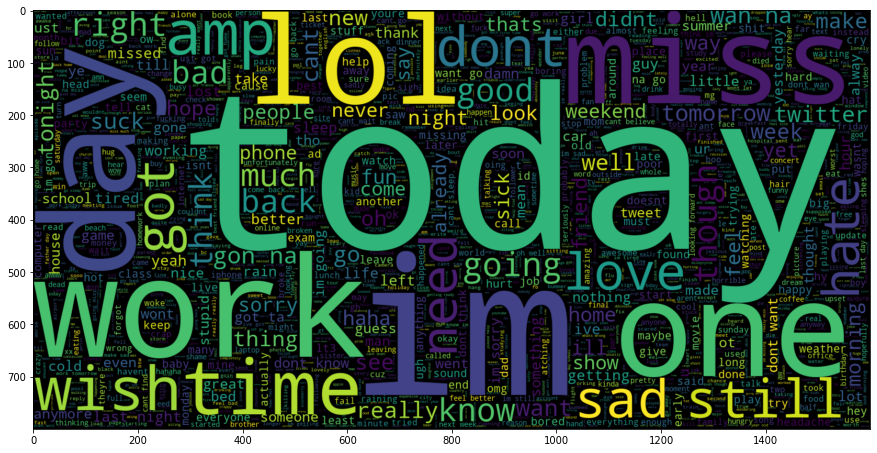

In [24]:
plt.figure(figsize = (15,15)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.polarity == 0].processed_tweets))
plt.imshow(wc , interpolation = 'bilinear')

### Word-Cloud for Positive tweets.

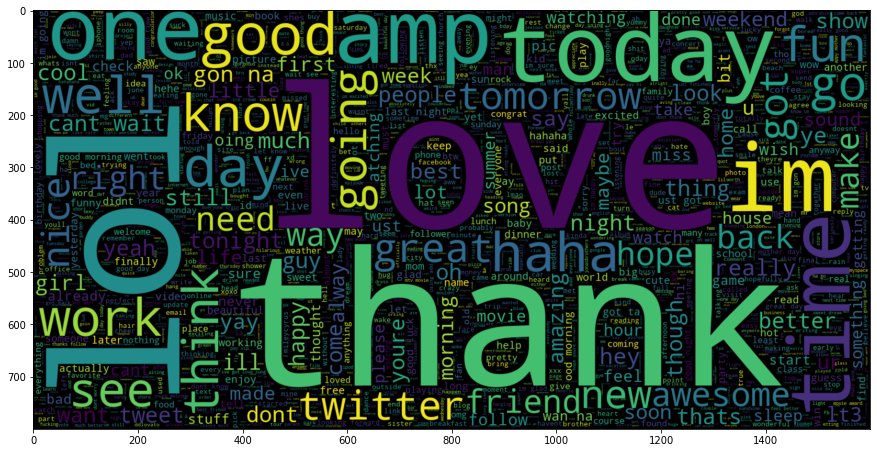

In [25]:
plt.figure(figsize = (15,15)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.polarity == 1].processed_tweets))
plt.imshow(wc , interpolation = 'bilinear')

## Vectorization and Splitting the data <a id="6"></a>
Storing input variable-processes_tweets to X and output variable-polarity to y

In [26]:
X = data['processed_tweets'].values
y = data['polarity'].values


In [27]:
print(X.shape)
print(y.shape)

(200000,)
(200000,)


## Convert text to word frequency vectors
### TF-IDF
 This is an acronym than stands for **Term Frequency – Inverse Document** Frequency which are the components of the resulting scores assigned to each word.

* Term Frequency: This summarizes how often a given word appears within a document.
* Inverse Document Frequency: This downscales words that appear a lot across documents.

In [28]:
#Convert a collection of raw documents to a matrix of TF-IDF features.
vector = TfidfVectorizer(sublinear_tf=True)
X = vector.fit_transform(X)
print(f'Vector fitted.')
print('No. of feature_words: ', len(vector.get_feature_names()))

Vector fitted.
No. of feature_words:  170345


In [29]:
print(X.shape)
print(y.shape)

(200000, 170345)
(200000,)


## Split train and test

The Preprocessed Data is divided into 2 sets of data:

* Training Data: The dataset upon which the model would be trained on. Contains 80% data.
* Test Data: The dataset upon which the model would be tested against. Contains 20% data.




In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [31]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print()
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (160000, 170345)
y_train (160000,)

X_test (40000, 170345)
y_test (40000,)


# Model Building <a id="7"></a>

### Model evaluating function

In [32]:
def model_Evaluate(model):
    #accuracy of model on training data
    acc_train=model.score(X_train, y_train)
    #accuracy of model on test data
    acc_test=model.score(X_test, y_test)
    
    print('Accuracy of model on training data : {}'.format(acc_train*100))
    print('Accuracy of model on testing data : {} \n'.format(acc_test*100))

    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Reds',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

### Logistic Regression <a id="8"></a>

Accuracy of model on training data : 83.430625
Accuracy of model on testing data : 76.7275 

              precision    recall  f1-score   support

           0       0.78      0.74      0.76     20010
           1       0.75      0.80      0.77     19990

    accuracy                           0.77     40000
   macro avg       0.77      0.77      0.77     40000
weighted avg       0.77      0.77      0.77     40000



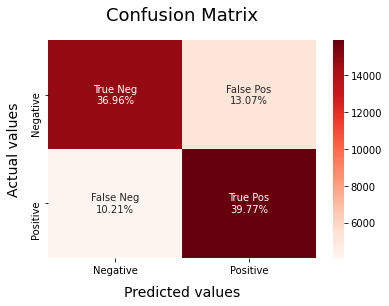

In [33]:
lg = LogisticRegression()
history=lg.fit(X_train, y_train)
model_Evaluate(lg)

### Linear SVM <a id="9"></a>

Accuracy of model on training data : 93.094375
Accuracy of model on testing data : 75.8775 

              precision    recall  f1-score   support

           0       0.77      0.74      0.75     20010
           1       0.75      0.78      0.76     19990

    accuracy                           0.76     40000
   macro avg       0.76      0.76      0.76     40000
weighted avg       0.76      0.76      0.76     40000



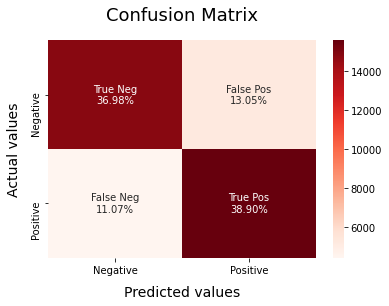

In [34]:
svm = LinearSVC()
svm.fit(X_train, y_train)
model_Evaluate(svm)

### Random Forest <a id="10"></a>

Accuracy of model on training data : 74.76375
Accuracy of model on testing data : 70.1025 

              precision    recall  f1-score   support

           0       0.76      0.59      0.66     20010
           1       0.66      0.81      0.73     19990

    accuracy                           0.70     40000
   macro avg       0.71      0.70      0.70     40000
weighted avg       0.71      0.70      0.70     40000



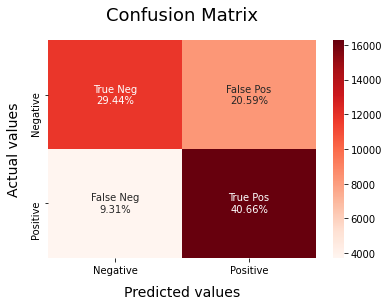

In [35]:
rf = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', max_depth=50)
rf.fit(X_train, y_train)
model_Evaluate(rf)

### Naive Bayes <a id="11"></a>

Accuracy of model on training data : 86.704375
Accuracy of model on testing data : 75.8325 

              precision    recall  f1-score   support

           0       0.75      0.78      0.76     20010
           1       0.77      0.74      0.75     19990

    accuracy                           0.76     40000
   macro avg       0.76      0.76      0.76     40000
weighted avg       0.76      0.76      0.76     40000



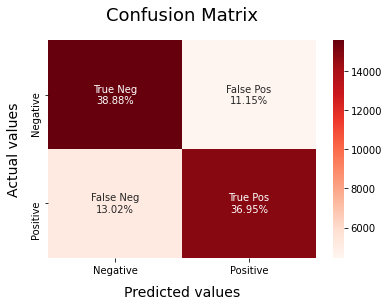

In [36]:
nb = BernoulliNB()
nb.fit(X_train, y_train)
model_Evaluate(nb)